In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import hsv_to_rgb

In [2]:
!pip3 install opencv-python

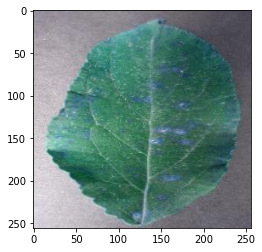

In [2]:
img = cv2.imread('./image.jpg')
plt.imshow(img)
plt.show()

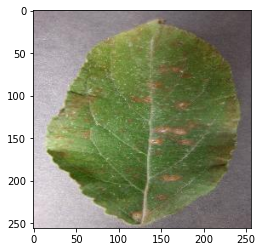

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

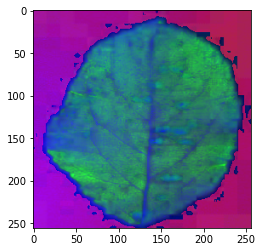

In [4]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

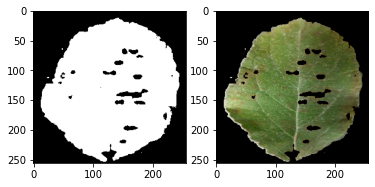

In [5]:
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

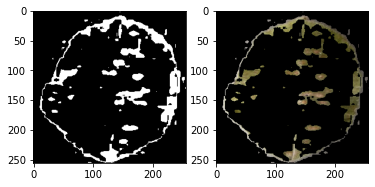

In [6]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()

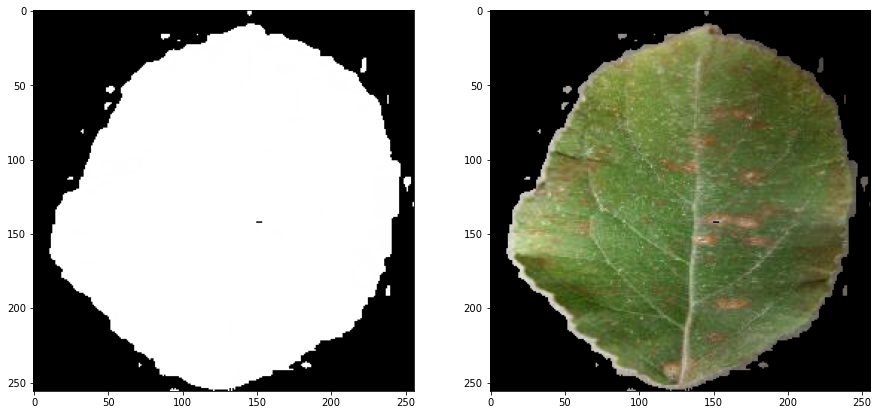

In [7]:
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [8]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install opencv-contrib-python --user

Note: you may need to restart the kernel to use updated packages.


In [24]:
import cv2
sift = cv2.xfeatures2d.SIFT_create(400)

In [10]:
# Find keypoints and descriptors directly
kp, des = sift.detectAndCompute(final_result,None)

In [11]:
len(kp)

263

In [12]:
print(kp)

(<KeyPoint 000001B2ACD0FBD0>, <KeyPoint 000001B2ACD0F2A0>, <KeyPoint 000001B2ACD15630>, <KeyPoint 000001B2AC964BA0>, <KeyPoint 000001B2ACDB27E0>, <KeyPoint 000001B2ACD27360>, <KeyPoint 000001B2ACD27810>, <KeyPoint 000001B2ACD27570>, <KeyPoint 000001B2ACDC2E40>, <KeyPoint 000001B2ACCCE540>, <KeyPoint 000001B2ACCCE3F0>, <KeyPoint 000001B2ACCCE510>, <KeyPoint 000001B2ACCCE420>, <KeyPoint 000001B2ACDA9690>, <KeyPoint 000001B2ACDA9660>, <KeyPoint 000001B2ACDA9BA0>, <KeyPoint 000001B2ACDA97B0>, <KeyPoint 000001B2ACDA92A0>, <KeyPoint 000001B2ACDA9B70>, <KeyPoint 000001B2ACDA9720>, <KeyPoint 000001B2ACDA9D20>, <KeyPoint 000001B2ACDA9210>, <KeyPoint 000001B2ACE3F6F0>, <KeyPoint 000001B2ACE3F840>, <KeyPoint 000001B2ACE3F870>, <KeyPoint 000001B2ACE3F8A0>, <KeyPoint 000001B2ACE3F7E0>, <KeyPoint 000001B2ACE3F780>, <KeyPoint 000001B2ACE3F6C0>, <KeyPoint 000001B2ACE3F720>, <KeyPoint 000001B2ACE3F7B0>, <KeyPoint 000001B2ACED8C60>, <KeyPoint 000001B2ACED8C90>, <KeyPoint 000001B2ACED8CC0>, <KeyPoint 000

In [13]:
print(des)

[[14.  0.  0. ... 82.  0.  0.]
 [ 6.  0.  0. ...  4.  0.  0.]
 [31. 15.  0. ... 22.  5.  2.]
 ...
 [ 1.  0.  0. ...  0.  3.  3.]
 [40.  0.  2. ...  2.  0.  1.]
 [ 8.  5.  0. ...  0.  6. 15.]]


In [14]:
img2 = cv2.drawKeypoints(final_result,kp,None,(255,0,0),4)

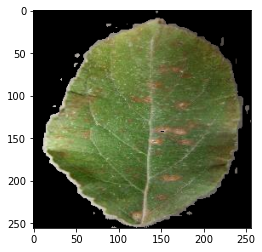

In [15]:
plt.imshow(final_result)

In [16]:
# global Feature
global_feature = des

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_feature)

In [18]:
global_feature.shape

(263, 128)

In [19]:
sift.descriptorSize()

128

In [20]:
print("[STATUS] feature vector size {}".format(np.array(global_feature).shape))

[STATUS] feature vector size (263, 128)


In [21]:
a = global_feature
np.savetxt("doo.csv", a, delimiter=",")